About Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Dataset columns:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8 FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [108]:
df=pd.read_csv('C:/Users/pawan/Desktop/python/Pwds/Regretion/Algerian_forest_fires_cleaned_dataset.csv')

In [109]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
237,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
238,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
239,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [110]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [111]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [112]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [113]:
df=df.drop(122).reset_index(drop=True)
df.iloc[[122]]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1


In [114]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
236,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
237,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
238,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [115]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [116]:
# fix spaces in columns name
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  Region       240 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.3+ KB


<!-- agar data type integer,or float type na ho to ham use integer type me badlenge   -->
usekeliye function ka use karenge

In [118]:
# chanching  the required columns as integer data type
df['day']=df['day'].astype(int)

In [119]:
# floating 
objects=[featurres for featurres in df.columns if df[featurres].dtypes=='O']
objects

['Classes']

In [120]:
df.info

<bound method DataFrame.info of      day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
235   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
236   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
237   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
238   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
239   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8

In [121]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
236,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
237,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
238,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [122]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          240 non-null    int64  
 1   month        240 non-null    int64  
 2   year         240 non-null    int64  
 3   Temperature  240 non-null    int64  
 4   RH           240 non-null    int64  
 5   Ws           240 non-null    int64  
 6   Rain         240 non-null    float64
 7   FFMC         240 non-null    float64
 8   DMC          240 non-null    float64
 9   DC           240 non-null    float64
 10  ISI          240 non-null    float64
 11  BUI          240 non-null    float64
 12  FWI          240 non-null    float64
 13  Classes      240 non-null    object 
 14  Region       240 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.3+ KB


In [124]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


<!-- Explore the data analysis -->

In [125]:
#let ave the clean dataset 
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

In [126]:
df_copy=df.drop(['day','month','year'],axis=1)

In [127]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [128]:
# categorical in class 
df_copy['Classes'].value_counts()



Classes
fire             131
not fire          98
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [129]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [130]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),'0','1')

In [131]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
235,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
236,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
237,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
238,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
239,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [132]:
# plot
# import matplotlib.pyplot as plt
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(15,10))
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

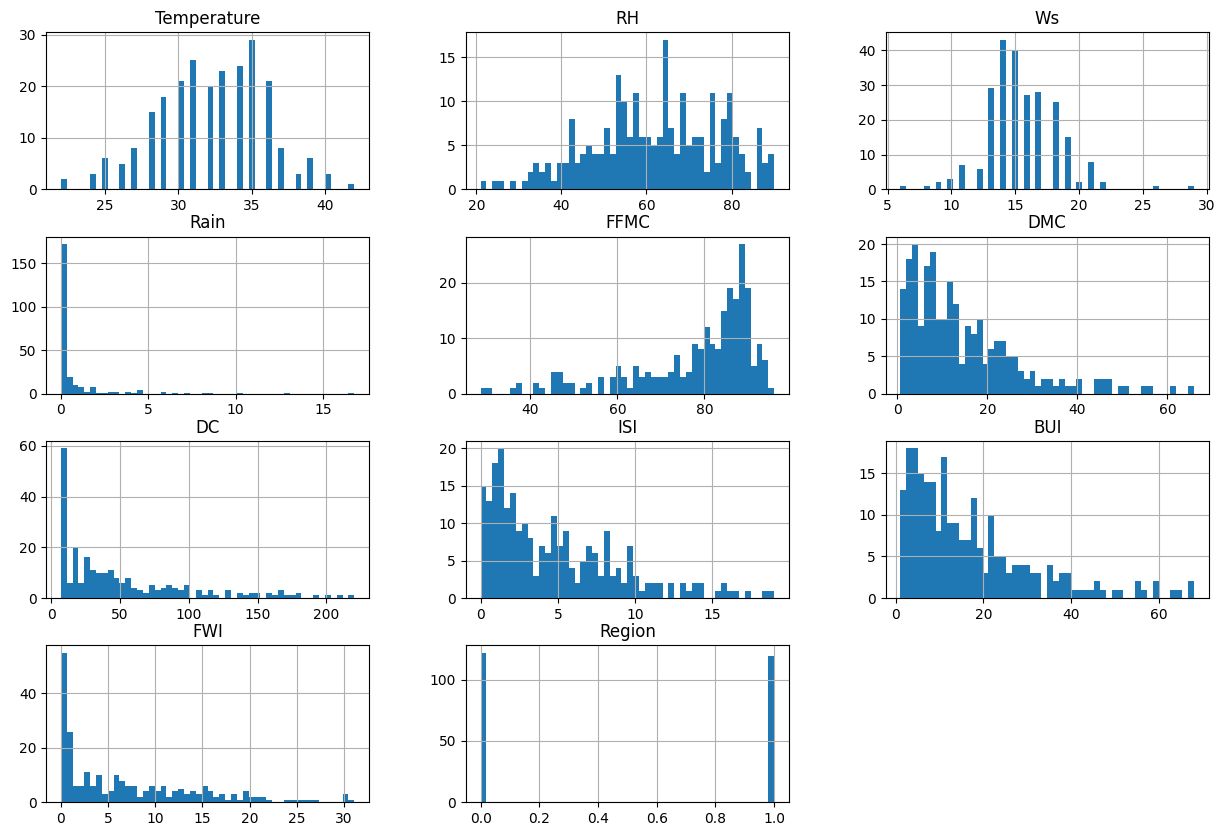

In [101]:
df_copy.hist(bins=50,figsize=(15,10))
plt.show()

In [105]:
# correlation
corr_matrix=df_copy.corr()
print(corr_matrix)

             Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.651184 -0.288538 -0.324519  0.679353  0.485406   
RH             -0.651184  1.000000  0.251609  0.219067 -0.643718 -0.405444   
Ws             -0.288538  0.251609  1.000000  0.179167 -0.182322 -0.009466   
Rain           -0.324519  0.219067  0.179167  1.000000 -0.541693 -0.285066   
FFMC            0.679353 -0.643718 -0.182322 -0.541693  1.000000  0.599438   
DMC             0.485406 -0.405444 -0.009466 -0.285066  0.599438  1.000000   
DC              0.375432 -0.223201  0.072004 -0.294782  0.502847  0.875084   
ISI             0.604182 -0.685228 -0.000320 -0.344192  0.737525  0.677847   
BUI             0.459374 -0.350446  0.023004 -0.296227  0.587699  0.982107   
FWI             0.566649 -0.578951  0.024420 -0.321227  0.688538  0.874943   
Classes         0.516166 -0.428928 -0.080857 -0.375657  0.766622  0.581867   
Region          0.273554 -0.410789 -0.173839 -0.047080  0.237933

In [133]:
corr_matrix['FWI'].sort_values(ascending=False)

FWI            1.000000
ISI            0.922326
DMC            0.874943
BUI            0.856918
DC             0.737783
Classes        0.716898
FFMC           0.688538
Temperature    0.566649
Region         0.206362
Ws             0.024420
Rain          -0.321227
RH            -0.578951
Name: FWI, dtype: float64

In [140]:
X_train=df_copy[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']]  
y_train=df_copy['Classes']
X_train.shape,y_train.shape

((240, 11), (240,))

In [149]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.649802,-0.291140,-0.323022,0.678971,0.483523,0.373420,0.602681,0.457422,0.565171,0.278260
RH,-0.649802,1.000000,0.255299,0.216739,-0.640929,-0.402397,-0.219748,-0.683522,-0.347170,-0.577025,-0.418104
Ws,-0.291140,0.255299,1.000000,0.180838,-0.188755,-0.011795,0.070162,-0.002766,0.020802,0.022351,-0.172026
Rain,-0.323022,0.216739,0.180838,1.000000,-0.541563,-0.283254,-0.293190,-0.342487,-0.294472,-0.319623,-0.049869
FFMC,0.678971,-0.640929,-0.188755,-0.541563,1.000000,0.597287,0.500500,0.736569,0.585522,0.687824,0.249356
DMC,0.483523,-0.402397,-0.011795,-0.283254,0.597287,1.000000,0.874645,0.676371,0.982032,0.874453,0.207052
DC,0.373420,-0.219748,0.070162,-0.293190,0.500500,0.874645,1.000000,0.503163,0.941429,0.736874,-0.068525
ISI,0.602681,-0.683522,-0.002766,-0.342487,0.736569,0.676371,0.503163,1.000000,0.639580,0.922033,0.279636
BUI,0.457422,-0.347170,0.020802,-0.294472,0.585522,0.982032,0.941429,0.639580,1.000000,0.856361,0.102985
FWI,0.565171,-0.577025,0.022351,-0.319623,0.687824,0.874453,0.736874,0.922033,0.856361,1.000000,0.211173


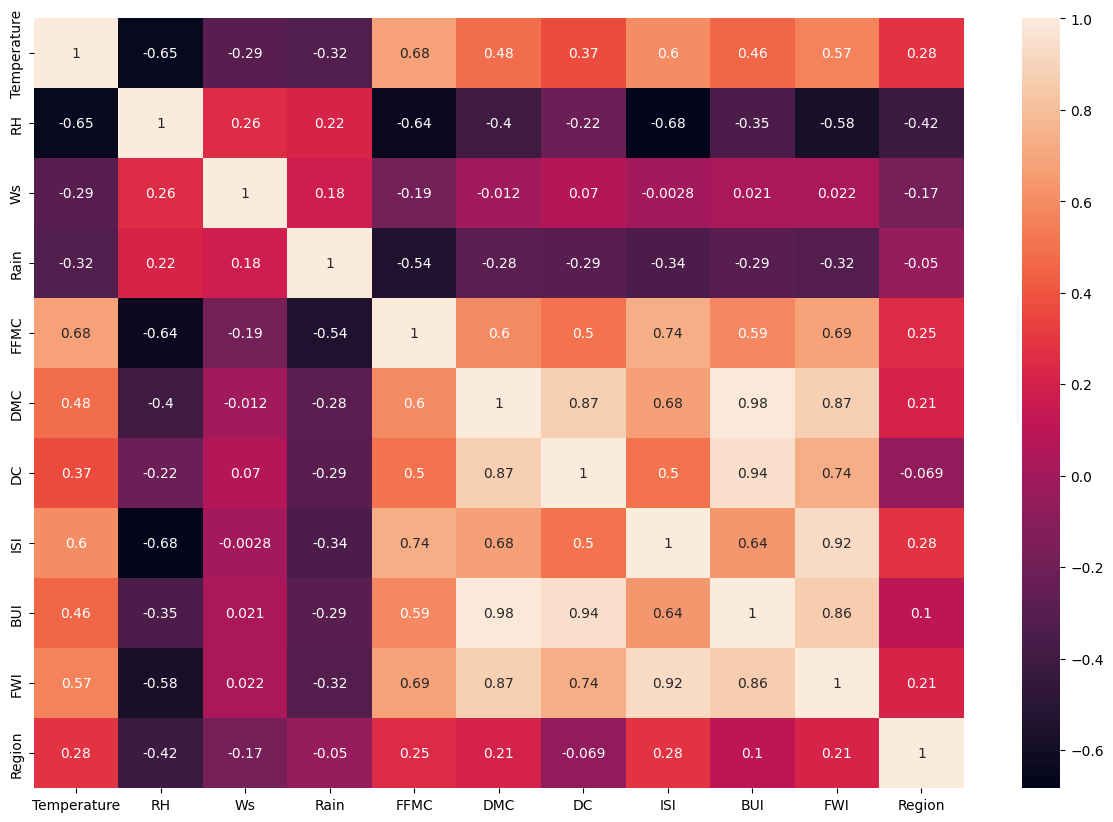

In [154]:
# cheack the malticollinearity

plt.figure(figsize=(15,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [155]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
        return col_corr

In [161]:
# threshold
corr_features=correlation(X_train,0.85)


In [163]:
corr_features

set()

In [165]:
# box plot


plt.subplot(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxenplot(data=X_train)
plt.title('X_train After Selling')

AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

In [167]:
# Linear regresion model
from sklearn.linear_model import LeniarRegression
from sklearn.metrics import accuracy_score
from sklearn.matrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_train)
print('Accuracy Score :',accuracy_score(y_train,y_pred))
print('R2 Score :',r2_score(y_train,y_pred))

ImportError: cannot import name 'LeniarRegression' from 'sklearn.linear_model' (c:\Users\pawan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\__init__.py)

In [168]:
# Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_train)
print('Accuracy Score :',accuracy_score(y_train,y_pred))
print('R2 Score :',r2_score(y_train,y_pred))


NameError: name 'accuracy_score' is not defined

In [169]:
# Elasticnet
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_train)
print('Accuracy Score :',accuracy_score(y_train,y_pred))
print('R2 Score :',r2_score(y_train,y_pred))

NameError: name 'accuracy_score' is not defined